<a href="https://colab.research.google.com/github/weathon/Lab-4-Python/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import style
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
style.use('ggplot')

In [ ]:
!wget -O OurDetial.data mp3.weasoft.com/OurDetial.data # Forgot to use 4 sig figs 
!wget -O OurWideRange.data  mp3.weasoft.com/OurWideRange.data 
!wget -O OtherDetial.data mp3.weasoft.com/OtherDetial.data
!wget -O OtherWideRange.data mp3.weasoft.com/OtherWideRange.data

In [ ]:
def setText(plot, title, xlab, ylab):
  plot.title(title);plot.xlabel(xlab);plot.ylabel(ylab)

In [ ]:
def readData(filename):
  res = []
  with open(filename, "r") as f:
    con = f.readlines()
  for i in con:
    if i.startswith("#"):
      continue
    row = []
    for j in i.split(","):
      try:
        row.append(float(j))
      except:
        row.append(np.NaN)
        pass
    res.append(row)
  return res

In [ ]:
x1 = np.array(list(range(1,54)))
x1 = np.delete(x1, 24)
x1 = np.delete(x1, 1)

wide1 = readData("OurWideRange.data")
wide1 = np.delete(wide1, 24)
wide1 = np.delete(wide1, 1)

data2 = np.array(readData("OurDetial.data"))
x2 = data2[:,0]
detial1 = data2[:,1]
combindedX = np.append(x1, x2)
combindedY = np.append(wide1, detial1)
indexes = np.argsort(combindedX)
combindedY = combindedY[indexes]
combindedX = combindedX[indexes]

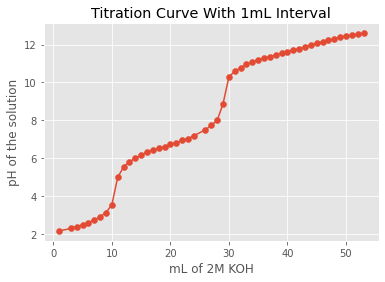

In [ ]:
plot.scatter(x1, wide1)
setText(plot,"Titration Curve With 1mL Interval","mL of 2M KOH","pH of the solution")
plot.plot(x1, wide1)

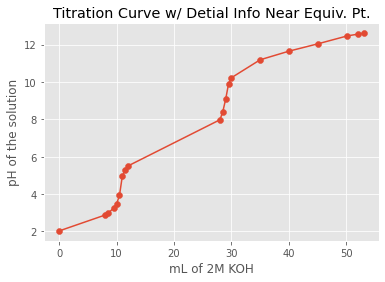

In [20]:
plot.scatter(x2, detial1)
setText(plot,"Titration Curve w/ Detial Info Near Equiv. Pt.","mL of 2M KOH","pH of the solution")
plot.plot(x2, detial1)

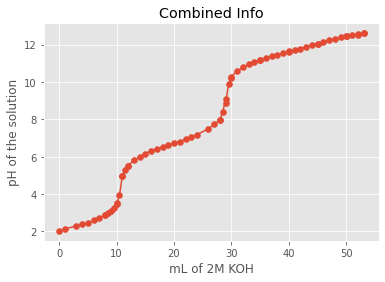

In [ ]:
plot.scatter(combindedX, combindedY)
setText(plot,"Combined Info","mL of 2M KOH","pH of the solution")
plot.plot(combindedX, combindedY)

In [22]:
def takeDerivative(X, Y):
  derivativeX = []
  derivative = []
  for i in range(1,X.shape[0]):
    if (X[i]-X[i-1]) == 0:
      continue
    derivativeX.append((X[i]+X[i-1])/2)
    derivative.append((Y[i]-Y[i-1])/(X[i]-X[i-1]))
  return derivativeX, derivative

In [23]:
derivativeX, derivative = takeDerivative(x1, wide1)
plot.scatter(derivativeX, derivative)
plot.plot(derivativeX, derivative)
setText(plot,"Derivative of 1mL-Interval Plot","mL of 2M KOH","pH/mL")
# WOW LOOKS LIKE HPLC 

In [26]:
# Find Peak
leftHalf = derivative[:20]
leftHalfX = derivativeX[:20]
rightHalf = derivative[20:]
rightHalfX = derivativeX[20:]
print(f"Peak one: {leftHalfX[np.argmax(leftHalf)]}")
print(f"Peak two: {rightHalfX[np.argmax(rightHalf)]}") # Their shift are the same

Peak one: 10.5
Peak two: 29.5


In [ ]:
OD = np.array(readData("OtherDetial.data")[:-1])
OW = np.array(readData("OtherWideRange.data")[:-1])

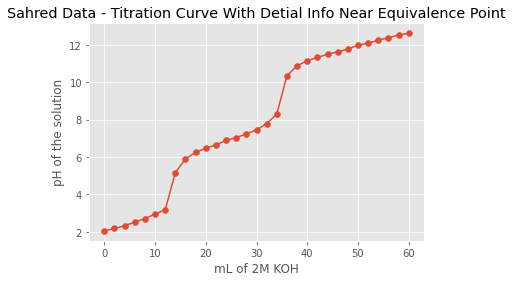

In [ ]:
plot.scatter(OW[:,0], OW[:,1])
setText(plot,"Sahred Data - Titration Curve With Detial Info Near Equivalence Point","mL of 2M KOH","pH of the solution")
plot.plot(OW[:,0], OW[:,1])

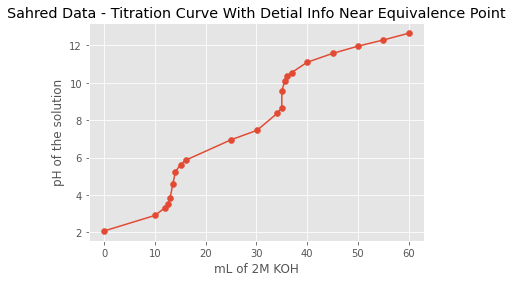

In [ ]:
plot.scatter(OD[:,0], OD[:,1])
setText(plot,"Sahred Data - Titration Curve With Detial Info Near Equivalence Point","mL of 2M KOH","pH of the solution")
plot.plot(OD[:,0], OD[:,1])

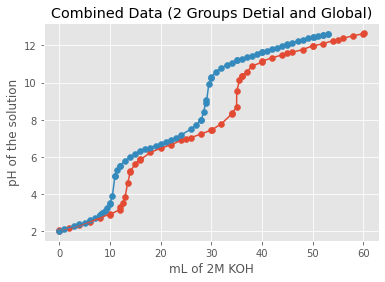

In [ ]:
combindedX2 = np.append(OD[:,0], OW[:,0])
combindedY2 = np.append(OD[:,1], OW[:,1])
indexes = np.argsort(combindedX2)
combindedY2 = combindedY2[indexes]
combindedX2 = combindedX2[indexes]
plot.scatter(combindedX2, combindedY2)
plot.scatter(combindedX, combindedY)
setText(plot,"Combined Data (2 Groups Detial and Global)","mL of 2M KOH","pH of the solution")
plot.plot(combindedX2, combindedY2)
plot.plot(combindedX, combindedY)